# AIMIA Homework 2 - Data exploration
## Libraries & Settings

In [25]:
# Add any libraries here
import os, glob, ntpath
import re

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# For medical images
import pydicom as dicom
import nibabel as nib
import nrrd

# For resample
import scipy
import scipy.ndimage as ndimage

In [26]:
# Settings
# Add any path here
#dicompath = None
#labelpath_nifti = None
#labelpath_nrrd = None
#print(os.getcwd())
HGG_path = "./hw2/HGG/"
LGG_path = "./hw2/LGG/"
HGG_image_pathlist = os.listdir(HGG_path) 
LGG_image_pathlist = os.listdir(LGG_path)
print(HGG_image_pathlist) 
print(LGG_image_pathlist) 

['Brats17_2013_10_1', 'Brats17_2013_11_1', 'Brats17_2013_12_1', 'Brats17_2013_13_1', 'Brats17_2013_14_1', 'Brats17_2013_17_1', 'Brats17_2013_18_1', 'Brats17_2013_19_1', 'Brats17_2013_20_1', 'Brats17_2013_21_1', 'Brats17_2013_22_1', 'Brats17_2013_23_1', 'Brats17_2013_25_1', 'Brats17_2013_26_1', 'Brats17_2013_27_1', 'Brats17_2013_2_1', 'Brats17_2013_3_1', 'Brats17_2013_4_1', 'Brats17_2013_5_1', 'Brats17_2013_7_1', 'Brats17_CBICA_AAB_1', 'Brats17_CBICA_AAG_1', 'Brats17_CBICA_AAL_1', 'Brats17_CBICA_AAP_1', 'Brats17_CBICA_ABB_1', 'Brats17_CBICA_ABE_1', 'Brats17_CBICA_ABM_1', 'Brats17_CBICA_ABN_1', 'Brats17_CBICA_ABO_1', 'Brats17_CBICA_ABY_1', 'Brats17_CBICA_ALN_1', 'Brats17_CBICA_ALU_1', 'Brats17_CBICA_ALX_1', 'Brats17_CBICA_AME_1', 'Brats17_CBICA_AMH_1', 'Brats17_CBICA_ANG_1', 'Brats17_CBICA_ANI_1', 'Brats17_CBICA_ANP_1', 'Brats17_CBICA_ANZ_1', 'Brats17_CBICA_AOD_1', 'Brats17_CBICA_AOH_1', 'Brats17_CBICA_AOO_1', 'Brats17_CBICA_AOP_1', 'Brats17_CBICA_AOZ_1', 'Brats17_CBICA_APR_1', 'Brats17_

## Useful functions
You can find some useful functions from previous lecture materials

In [27]:
'''
>How many patients / cases are there?
75 in LGG(Low-grade glioma), 210 in HGG(high-grade glioma)

>What is the data form?
Um...nifti? 
nii.gz 

>How many files are there in each cases and what do they mean?
5
For each patient, four co-registered MRI scans are available: 
(1)T1-weighted (2)T1-weighted contrast enhanced (T1CE) with gadolinium contrast agent
(3)T2-weighted (4)FLAIR.
The last one is "seg", must be the result of tumor segmentation as those images shown below.


>What is the size of image and label? Are they the same?
They must be the same or we can't correctly stack them together.
After showed those image and label, we can ensure that thet are really the same.

'''

'\n>How many patients / cases are there?\n75 in LGG(Low-grade glioma), 210 in HGG(high-grade glioma)\n\n>What is the data form?\nUm...nifti? \n\n>How many files are there in each cases and what do they mean?\n5\nFor each patient, four co-registered scans are available: \n(1)T1-weighted (2)T1-weighted contrast enhanced (T1CE) with gadolinium contrast agent\n(3)T2-weighted (4)FLAIR.\nThe last one is "seg", and I don\'t know what it is.\n\n\n>What is the size of image and label? Are they the same?\nThey must be the same or we can\'t correctly stack them together.\n\n'

In [72]:
def plot_image(seg,t1,t2,t1ce,flair, ax, co, sa):
    plt.figure(figsize=(16,9))
    # Original image - axial
    plt.subplot(5,3,1)
    plt.imshow(seg[:,:,ax].T)#, cmap='gray'
    plt.title("Label image")

    # Original image - coronal
    plt.subplot(5,3,2)
    plt.imshow(seg[:,co,:].T) #, cmap='gray'
    plt.title("Label image")

    # Original image - sagittal
    plt.subplot(5,3,3)
    plt.imshow(seg[sa,:,:].T)#, cmap='gray'
    plt.title("Label image")
    
    
    plt.subplot(5,3,4)
    plt.imshow(t1[:,:,ax].T, cmap='gray')
    plt.title("t1 image")

    # Label image - coronal
    plt.subplot(5,3,5)
    plt.imshow(t1[:,co,:].T, cmap='gray')
    plt.title("t1 image")

    # Label image - sagittal
    plt.subplot(5,3,6)
    plt.imshow(t1[sa,:,:].T, cmap='gray')
    plt.title("t1 image")
    
    
    plt.subplot(5,3,7)
    plt.imshow(t2[:,:,ax].T, cmap='gray')
    plt.title("t2 image")

    # Label image - coronal
    plt.subplot(5,3,8)
    plt.imshow(t2[:,co,:].T, cmap='gray')
    plt.title("t2 image")

    # Label image - sagittal
    plt.subplot(5,3,9)
    plt.imshow(t2[sa,:,:].T, cmap='gray')
    plt.title("t2 image")

    plt.subplot(5,3,10)
    plt.imshow(t1ce[:,:,ax].T, cmap='gray')
    plt.title("t1ce image")

    # Label image - coronal
    plt.subplot(5,3,11)
    plt.imshow(t1ce[:,co,:].T, cmap='gray')
    plt.title("t1ce image")

    # Label image - sagittal
    plt.subplot(5,3,12)
    plt.imshow(t1ce[sa,:,:].T, cmap='gray')
    plt.title("t1ce image")
    
    plt.subplot(5,3,13)
    plt.imshow(flair[:,:,ax].T, cmap='gray')
    plt.title("flair image")

    # Label image - coronal
    plt.subplot(5,3,14)
    plt.imshow(flair[:,co,:].T, cmap='gray')
    plt.title("flair image")

    # Label image - sagittal
    plt.subplot(5,3,15)
    plt.imshow(flair[sa,:,:].T, cmap='gray')
    plt.title("flair image")
    

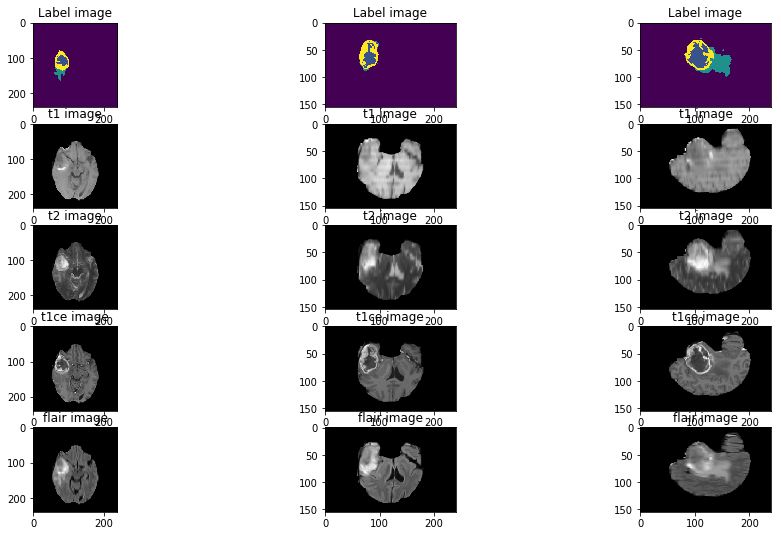

In [73]:
ax = 60 
co = 100
sa = 80

segfile = nib.load(HGG_path+HGG_image_pathlist[0]+"/"+HGG_image_pathlist[0]+"_seg.nii")
seg_nifti = np.array(segfile.dataobj)
t1file = nib.load(HGG_path+HGG_image_pathlist[0]+"/"+HGG_image_pathlist[0]+"_t1.nii")
t1_nifti = np.array(t1file.dataobj)
t2file = nib.load(HGG_path+HGG_image_pathlist[0]+"/"+HGG_image_pathlist[0]+"_t2.nii")
t2_nifti = np.array(t2file.dataobj)
t1cefile = nib.load(HGG_path+HGG_image_pathlist[0]+"/"+HGG_image_pathlist[0]+"_t1ce.nii")
t1ce_nifti = np.array(t1cefile.dataobj)
flairfile = nib.load(HGG_path+HGG_image_pathlist[0]+"/"+HGG_image_pathlist[0]+"_flair.nii")
flair_nifti = np.array(flairfile.dataobj)

plot_image(seg_nifti,t1_nifti,t2_nifti,t1ce_nifti,flair_nifti, ax, co, sa)

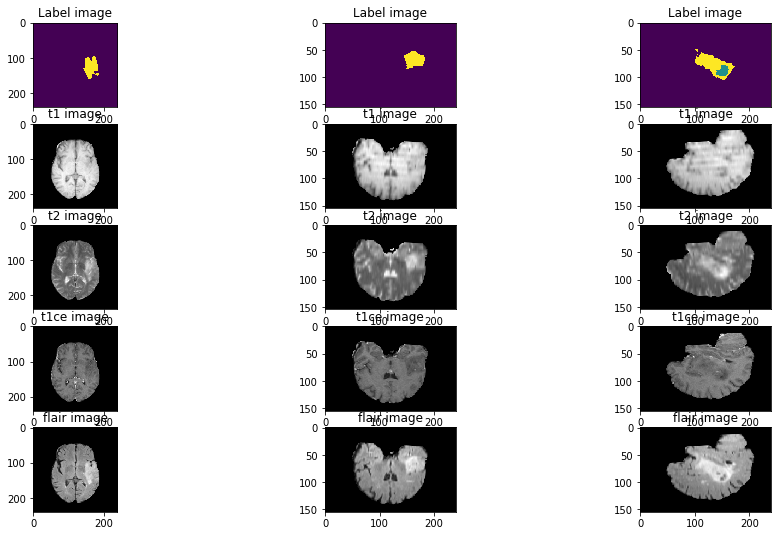

In [75]:
ax = 70 
co = 120
sa = 150

#Brats17_2013_16_1
segfile = nib.load(LGG_path+LGG_image_pathlist[2]+"/"+LGG_image_pathlist[2]+"_seg.nii")
seg_nifti = np.array(segfile.dataobj)
t1file = nib.load(LGG_path+LGG_image_pathlist[2]+"/"+LGG_image_pathlist[2]+"_t1.nii")
t1_nifti = np.array(t1file.dataobj)
t2file = nib.load(LGG_path+LGG_image_pathlist[2]+"/"+LGG_image_pathlist[2]+"_t2.nii")
t2_nifti = np.array(t2file.dataobj)
t1cefile = nib.load(LGG_path+LGG_image_pathlist[2]+"/"+LGG_image_pathlist[2]+"_t1ce.nii")
t1ce_nifti = np.array(t1cefile.dataobj)
flairfile = nib.load(LGG_path+LGG_image_pathlist[2]+"/"+LGG_image_pathlist[2]+"_flair.nii")
flair_nifti = np.array(flairfile.dataobj)

plot_image(seg_nifti,t1_nifti,t2_nifti,t1ce_nifti,flair_nifti, ax, co, sa)

## Informations
Please write down the information of the database as detailed as possible. <br>
You can use either plain text or code to show your answer. <br>
Feel free to add the cell. <br>
Here are some question that must be included:
* How many patients / cases are there?
* What is the data form?
* How many files are there in each cases and what do they mean?
* What is the size of image and label? Are they the same?

## Informations
Please write down the information of the database as detailed as possible. <br>
You can use either plain text or code to show your answer. <br>
Feel free to add the cell. <br>
Here are some question that must be included:
* How many patients / cases are there?
* What is the data form?
* How many files are there in each cases and what do they mean?
* What is the size of image and label? Are they the same?

## Data Visualization
Please show some picture of the data, including image and label.